In [1]:
# connect google colab to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importing all the necessary libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.models import Sequential
from keras.layers import Flatten, Dense,Dropout
import keras
import numpy as np
from keras.callbacks import ModelCheckpoint,EarlyStopping
import matplotlib.pyplot as plt
import cv2
from keras.applications.inception_resnet_v2 import preprocess_input, decode_predictions

In [3]:
train = '/content/drive/MyDrive/Intel_Image_Classification/seg_train'
test = '/content/drive/MyDrive/Intel_Image_Classification/seg_test'

In [4]:
# taking data from the directory and transform it into same format
train_generator = ImageDataGenerator(validation_split=0.2,rescale=1./255)    

train_data = train_generator.flow_from_directory(batch_size=128,
                                                 directory=train,
                                                 target_size=(299,299), 
                                                 subset="training",
                                                 class_mode='categorical')

val_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
val_data = val_generator.flow_from_directory(batch_size=128,
                                                 directory=train,
                                                 target_size=(299,299), 
                                                 subset="validation",
                                                 class_mode='categorical')
test_gen = ImageDataGenerator(rescale=1./255)
test_data = test_gen.flow_from_directory(test,
                                       target_size=(299,299), batch_size=128)


Found 11238 images belonging to 6 classes.
Found 2806 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [8]:
# transfer learning using InceptionResNetV2 Model
model_Incep = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=[299, 299, 3])

219055592/219055592 [==============================] - 15s 0us/step


In [9]:
# in transfer Learning all layers all trained so we don't need to train it again 
# so we are doing it false which means will not train again
for layer in model_Incep.layers[:]:
    layer.trainable = False

In [10]:
# creating our model
model = Sequential()
model.add(model_Incep)
# Flatten for 1D
model.add(Flatten())
# Hidden layer
model.add(Dense(16,activation='relu'))
# output layer having 6 classes 
model.add(Dense(6, activation='softmax'))

In [11]:
# it adam optimizer with 0.00003 learning rate that helps model to learn data very slowly. it helps to increase accuracy
# when we keep our lr high there is high chance to loose our data
from keras.optimizers import Adam
opt = Adam(lr=0.00003)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [12]:
# we compile our model
# categorical_crossentropy takes the value in the form of one hot encondng 
# sparse_categorical_crossentropy takes the value in the form of list of value

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy']
              )

In [13]:
# Model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 8, 8, 1536)       54336736  
 onal)                                                           
                                                                 
 flatten (Flatten)           (None, 98304)             0         
                                                                 
 dense (Dense)               (None, 16)                1572880   
                                                                 
 dense_1 (Dense)             (None, 6)                 102       
                                                                 
Total params: 55,909,718
Trainable params: 1,572,982
Non-trainable params: 54,336,736
_________________________________________________________________


In [14]:
# we are training our model using fit 
hist=model.fit(train_data,validation_data=val_data, epochs=20,batch_size=128)

Epoch 1/20
88/88 [==============================] - 11939s 136s/step - loss: 0.4012 - accuracy: 0.8587 - val_loss: 0.2495 - val_accuracy: 0.9116
Epoch 2/20
88/88 [==============================] - 138s 2s/step - loss: 0.1858 - accuracy: 0.9356 - val_loss: 0.2254 - val_accuracy: 0.9138
Epoch 3/20
88/88 [==============================] - 137s 2s/step - loss: 0.1338 - accuracy: 0.9544 - val_loss: 0.2236 - val_accuracy: 0.9152
Epoch 4/20
88/88 [==============================] - 137s 2s/step - loss: 0.1030 - accuracy: 0.9685 - val_loss: 0.2154 - val_accuracy: 0.9177
Epoch 5/20
88/88 [==============================] - 137s 2s/step - loss: 0.0821 - accuracy: 0.9782 - val_loss: 0.2223 - val_accuracy: 0.9173
Epoch 6/20
88/88 [==============================] - 137s 2s/step - loss: 0.0670 - accuracy: 0.9830 - val_loss: 0.2143 - val_accuracy: 0.9177
Epoch 7/20
88/88 [==============================] - 137s 2s/step - loss: 0.0564 - accuracy: 0.9877 - val_loss: 0.2261 - val_accuracy: 0.9166
Epoch 8/2

In [18]:
# checking the accuracy on unseen images
model.evaluate(test_data,batch_size = 128)

24/24 [==============================] - 2364s 103s/step - loss: 0.2639 - accuracy: 0.9217


[0.2638970613479614, 0.92166668176651]

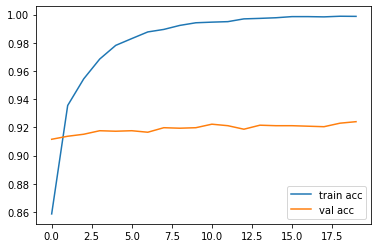

In [19]:
# plotting our accuracy train and validation
plt.plot(hist.history['accuracy'], label='train acc')

plt.plot(hist.history['val_accuracy'], label='val acc')

plt.legend()

plt.savefig('vgg-acc-rps-1.png')

plt.show()

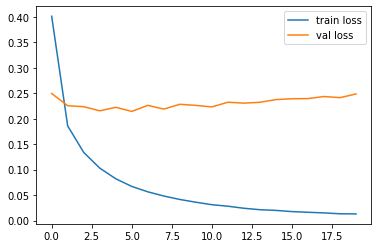

In [20]:
# plotting our loss train and validation
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('vgg-loss-rps-1.png')
plt.show()

In [21]:
# saving our model
from keras.models import load_model
model.save("InceptionResNetv2.h5")

In [23]:
# loading our saved model 
new_model = load_model('/content/InceptionResNetv2.h5')

In [24]:
# taking path
infer = '/content/drive/MyDrive/Intel_Image_Classification/Inference Data(DX)'

In [25]:
# fetching and transforming data
infered_gen = ImageDataGenerator(rescale=1./255)
infered_data = infered_gen.flow_from_directory(infer,
                                       target_size=(299,299), batch_size=128)

Found 3004 images belonging to 6 classes.


In [26]:
# checking the accuracy on unseen images
new_model.evaluate(infered_data,batch_size = 128)

24/24 [==============================] - 1816s 79s/step - loss: 1.0733 - accuracy: 0.8149


[1.0733094215393066, 0.8149134516716003]

In [27]:
# import metrics for checking accuracy ,classification_report and confusio_matrix
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [29]:
Y_pred = new_model.predict_generator(test_data)
y_pred = np.argmax(Y_pred,axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [30]:
# confusion matrix
confusion_matrix(test_data.classes,y_pred)

array([[ 62,  65,  74,  76,  72,  88],
       [ 67,  73, 102,  68,  91,  73],
       [ 82,  88, 102,  91,  99,  91],
       [ 59,  92,  85, 103,  97,  89],
       [ 77,  69,  96,  88,  90,  90],
       [ 78,  88,  75,  96,  82,  82]])

In [31]:
# classification report
classification_report(test_data.classes,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.15      0.14      0.14       437\n           1       0.15      0.15      0.15       474\n           2       0.19      0.18      0.19       553\n           3       0.20      0.20      0.20       525\n           4       0.17      0.18      0.17       510\n           5       0.16      0.16      0.16       501\n\n    accuracy                           0.17      3000\n   macro avg       0.17      0.17      0.17      3000\nweighted avg       0.17      0.17      0.17      3000\n'

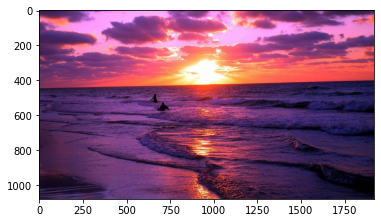

In [32]:
# now we are going to check our model giving right prediction or not
img = plt.imread('/content/drive/MyDrive/Intel_Image_Classification/Inference Data(DX)/Sea/1168417.jpg')
plt.imshow(img)
plt.show()

In [33]:
# resize our image in which our model trained
infer_img = cv2.resize(img,(299,299))

In [34]:
# convert our image to array
x = keras.utils.img_to_array(infer_img)
x = np.expand_dims(x,axis=0)

In [35]:
x = preprocess_input(x)

In [36]:
# final prediction
new_model.predict(x)

1/1 [==============================] - 4s 4s/step


array([[4.8622001e-12, 1.7568801e-11, 1.8012537e-09, 1.0170277e-14,
        9.9999988e-01, 9.3617203e-08]], dtype=float32)

In [37]:
# creating classes for prediction
intel = ['buildings','forest','glacier','mountain','sea','street']
# argmax gives us maximum argument of an array
predicted = intel[np.argmax(new_model.predict(x)[0])]

1/1 [==============================] - 0s 40ms/step


In [38]:
# we got the output our model is working well
predicted

'sea'